# Animazioni in un Jupyter book

Primo approccio alle animazioni[^interactivetextbooks-animations] in un Jupyter book.

[^interactivetextbooks-animations]:https://interactivetextbooks.tudelft.nl/open-textbooks-demonstration/content/Basic_animation_demo.html

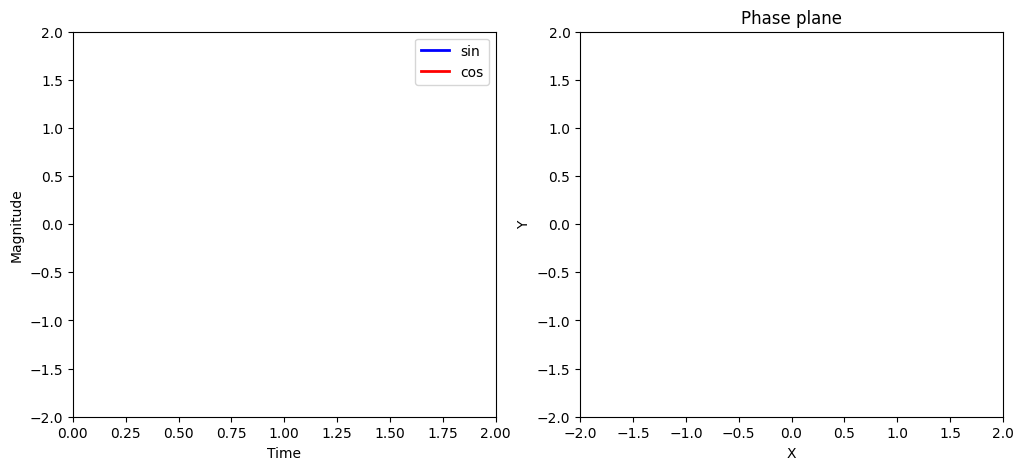

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axes.
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# Set up the subplots
ax1.set_xlim((0,2))
ax1.set_ylim((-2,2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase plane')

# Create objects that will change in the animiation.
# These objects are initially empty, and will be given new values for each frame in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)  # ax.plot returns a list of 2D line objects.
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin', 'cos']);

In [2]:
# Animation function. This function is called sequentially.
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data([y1[0]], [y2[0]])   # Note that matplotlib will throw an error if we supply only numbers (i.e., pt1.set_data(y1[0],y2[0]))
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [3]:
# Initialization function.
def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return(line1, line2)

In [4]:
from matplotlib import animation

#anim = animation.FuncAnimation(fig, drawframe, init_func=init, frames=100, interval=20, blit=True)
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)
# blit = True re-draws only the parts that have changed.

In [5]:
from IPython.display import HTML
HTML(anim.to_jshtml())